In [ ]:
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('wordnet')

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def preprocess_data(df):
  sentences = df.Sentence.values
  labels = df.Label.values
  tokenized_sentences = [word_tokenize(word) for word in sentences]
  filtered_sentences = [remove_stopwords(word) for word in tokenized_sentences]
  return filtered_sentences, labels

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(14,12))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
STOPWORD_SET = set(stopwords.words('english'))

print ("Train & Test Files are loaded")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
--2021-07-29 15:43:01--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29264 (29K) [application/vnd.ms-excel]
Saving to: ‘finance_test.csv’

finance_test.csv    100%[===================>]  28.58K  --.-KB/s    in 0s      

2021-07-29 15:43:01 (113 MB/s) - ‘finance_test.csv’ saved [29264/29264]

--2021-07-29 15:43:01--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%

In [ ]:
df_train = get_finance_train()
df_train.head()


,Sentence,Label
0,Autotank Group is part of Aspo 's Systems Division .,1
1,"The contract includes design , construction , delivery of equipment , installation and commissio...",1
2,Rapala said it estimates it will make savings of 1-2 mln eur a year by centralising its French o...,2
3,"The share capital of Alma Media Corporation (business ID 1944757-4)is EUR 45,031,513.80 and it i...",1
4,The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's resu...,2


In [ ]:
length = len(df_train)
print(length)


2037


In [ ]:
df_test = get_finance_test()
df_test.head()


,Sentence,Label
0,"In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating prof...",2
1,Foundries division reports its sales increased by 9.7 % to EUR 63.1 mn from EUR 57.5 mn in the c...,2
2,Financing of the project will come mainly from China .,1
3,"Sukhraj Dulai , of the 2900 block of Boni Sue Court , a cul-de-sac on the city 's north side , s...",1
4,Finland 's leading metals group Outokumpu said its fourth-quarter net profit more than tripled o...,2


In [ ]:
print(len(df_test))


227


In [ ]:
negative_data = df_train[df_train['Label']==0]

In [ ]:
positive_data = df_train[df_train['Label']==2]

In [ ]:
def remove_stopwords(tokenized_sentence):
  filtered_sentence = []
  for word in tokenized_sentence:
    if word not in STOPWORD_SET:
      filtered_sentence.append(word)
  return filtered_sentence

In [ ]:
train_sentences, train_labels = preprocess_data(df_train)
for item in range(5):
  print(train_sentences[item])



['Autotank', 'Group', 'part', 'Aspo', "'s", 'Systems', 'Division', '.']
['The', 'contract', 'includes', 'design', ',', 'construction', ',', 'delivery', 'equipment', ',', 'installation', 'commissioning', '.']
['Rapala', 'said', 'estimates', 'make', 'savings', '1-2', 'mln', 'eur', 'year', 'centralising', 'French', 'operations', 'one', 'site', '.']
['The', 'share', 'capital', 'Alma', 'Media', 'Corporation', '(', 'business', 'ID', '1944757-4', ')', 'EUR', '45,031,513.80', 'divided', '75,052,523', 'shares', '.']
['The', 'financial', 'impact', 'estimated', '1.5', 'MEUR', 'annual', 'improvement', 'division', "'s", 'result', ',', 'starting', 'fiscal', 'year', '2007', '.']


In [ ]:
test_sentences, test_labels = preprocess_data(df_test)
for item in range(5):
  print(test_sentences[item])

['In', 'third', 'quarter', '2010', ',', 'net', 'sales', 'increased', '5.2', '%', 'EUR', '205.5', 'mn', ',', 'operating', 'profit', '34.9', '%', 'EUR', '23.5', 'mn', '.']
['Foundries', 'division', 'reports', 'sales', 'increased', '9.7', '%', 'EUR', '63.1', 'mn', 'EUR', '57.5', 'mn', 'corresponding', 'period', '2006', ',', 'sales', 'Machine', 'Shop', 'division', 'increased', '16.4', '%', 'EUR', '41.2', 'mn', 'EUR', '35.4', 'mn', 'corresponding', 'period', '2006', '.']
['Financing', 'project', 'come', 'mainly', 'China', '.']
['Sukhraj', 'Dulai', ',', '2900', 'block', 'Boni', 'Sue', 'Court', ',', 'cul-de-sac', 'city', "'s", 'north', 'side', ',', 'started', 'vehicle', 'went', 'inside', 'house', '8', 'a.m.', 'Tuesday', ',', 'leaving', 'garage', 'door', 'open', '.']
['Finland', "'s", 'leading', 'metals', 'group', 'Outokumpu', 'said', 'fourth-quarter', 'net', 'profit', 'tripled', 'back', 'strong', 'global', 'demand', 'stainless', 'steel', ',', 'soaring', 'base', 'metal', 'prices', 'proceeds', 

In [ ]:
all_sentences = ["Google AI made remarkable achievements in 2019.", "Google Stock was at its all time high"]

vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(all_sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
bag_of_words_matrix = vectorizer.transform(all_sentences).toarray()

print(bag_of_words_matrix)

[[1 1 1 0 0 1 0 1 0 1 1 0 0 0]
 [0 0 0 1 1 1 1 0 1 0 0 1 1 1]]


In [ ]:
print(bag_of_words_matrix.shape)


(2, 14)


In [ ]:
def train_model(train_sentences, train_labels):
  train_sentences = [" ".join(t) for t in train_sentences]
  train_labels = [l for l in train_labels]
    
  vectorizer = CountVectorizer()

  train_vect = vectorizer.fit(train_sentences).transform(train_sentences)
  
  model = LogisticRegression()

  model.fit(train_vect, train_labels)
  
  return model, vectorizer

In [ ]:
model, train_vectorizer = train_model(train_sentences, train_labels)

In [ ]:
def predict(test_sentences, test_labels, vectorizer, model):
  test_sentences = [" ".join(t) for t in  test_sentences]
    
  test_vect = vectorizer.transform(test_sentences)

  preds = model.predict(test_vect)
  
  acc = metrics.accuracy_score(test_labels, preds)
  return preds, acc

In [ ]:
y_predictions, test_accuracy = predict(test_sentences, test_labels, train_vectorizer, model)


Plotting the Confusion Matrix


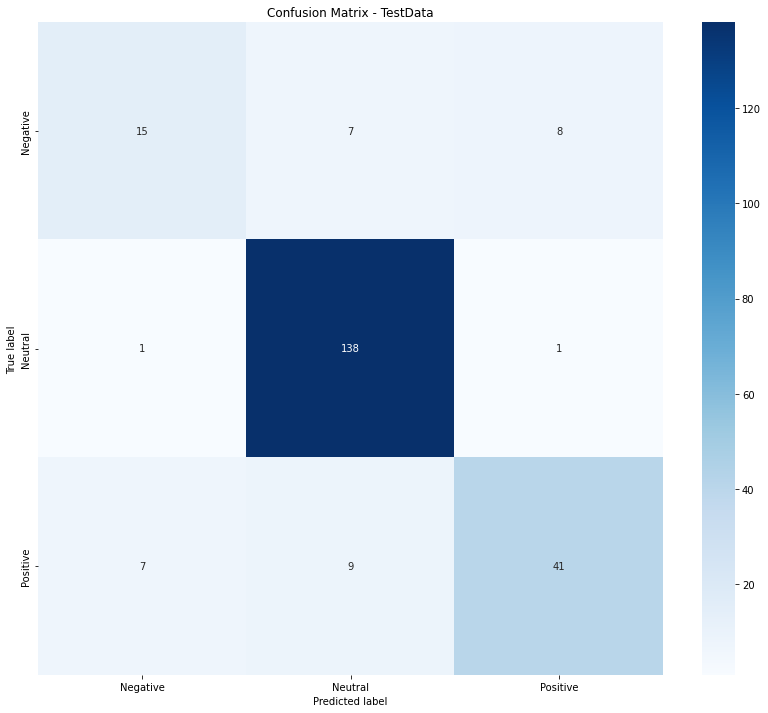

In [ ]:
plot_confusion_matrix(test_labels, y_predictions)